# Desriptive Analysis

---



*By Asmik Nalmpatian and Lisa Wimmer*

*Last edited on 30.03.21* 

*For our consulting project: Aspect-Based Sentiment Analysis for Twitter Data of German MPs*

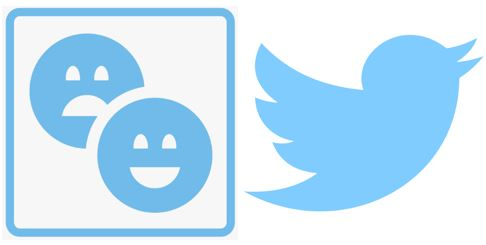

**Prepare Google Collab:**

1. Check: Edit --> Notebook settings -> Runtime type -> *R* 


2. You will need access to the following file: *data_labeled_processed.csv*


In [ ]:
# Install all required packages: 
install.packages("readr")
install.packages("tidyverse")
install.packages("tidytext")
install.packages("wordcloud")
install.packages("quanteda")

In [ ]:
# Load all required packages: 
install.packages(readr)
install.packages(tidyverse)
install.packages(tidytext)
install.packages(wordcloud)
install.packages(quanteda)

In [4]:
# Where do I have to upload the dataset data_labeled_processed.csv
getwd()

[1] "/content"

In [ ]:
# Load the data
data_labeled <- read_delim("data_labeled_processed.csv", ";", escape_double = FALSE, trim_ws = TRUE)

head(data_labeled)

In [ ]:
# Take a look at all existing topic categories 
unique(data_labeled$topic)

# Barplots

Distribution of Labels grouped by Topics over Years

In [6]:
# Extract year and save in a seperate column
data_labeled$year <- format(data_labeled$twitter_created_at, format = "%Y")

In [7]:
# Count the tweets grouped by year, topic and label
labels_per_year <- data_labeled %>% 
  group_by(year, topic) %>% 
  count(label) 

In [8]:
# Filter 4 topics to dive into their descriptive analysis
labels_per_year_filtered <- labels_per_year %>% 
  filter(topic %in% c("Coronamassnahmen", "Medien", "Migrantenkriminalitaet", "Klimapolitik"))


In [9]:
# Create a grouped and stacked barplot by ggplot package
barplot_label_per_year <- ggplot(labels_per_year_filtered, aes(y = n, x = label, fill = topic)) +
  geom_bar(position = "stack",
           stat = "identity") +
  facet_grid(. ~ year) +
  ylab("Count") +
  xlab("Label") +
  theme_classic() +
  theme(text = element_text(size = 17),
        axis.text.x = element_text(angle = 90, size = 17, vjust = 0.5),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
        legend.position = "right",
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_manual(
    "Topic",
    values = c("darkorange3", "cadetblue3", "goldenrod3", "hotpink3") 
  ) +
  labs(title = "") +
  ggtitle("Distribution of Labels grouped by Topics over Years")


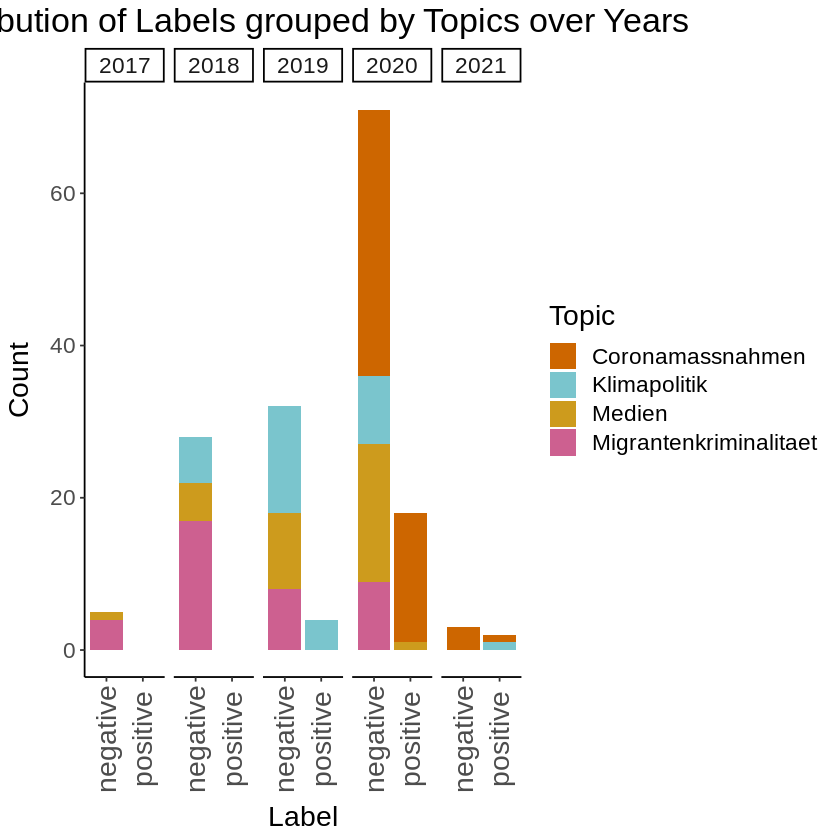

In [10]:
# Show the plot:
barplot_label_per_year

Distribution of Labels grouped by Topics

In [11]:
# Count the tweets grouped by topic and label
labels_per_topic <- data_labeled %>% 
  group_by(topic) %>% 
  count(label)

In [12]:
# Filter 9 topics to dive into their descriptive analysis
labels_per_topic_filtered <- labels_per_topic %>% 
  filter(topic %in% c("Antisemitismus", "AfD", "Coronamassnahmen",
                      "Parteipolitik", "Coronapolitik", "Klimapolitik",
                      "Rechtsextremismus", "Medien", "Gleichberechtigung"))


In [13]:
# Create a grouped and stacked barplot by ggplot package
barplot_label_per_topic <- ggplot(labels_per_topic_filtered, aes(y = n, x = topic, fill = label)) +
  geom_bar(position = "dodge",
           stat = "identity") +
  ylab("Count") +
  xlab("Topics") +
  theme_classic() +
  theme(text = element_text(size = 17),
        axis.text.x = element_text(angle = 90, size = 17, vjust = 0.5),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
        legend.position = "right",
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_manual(
    "Label",
    values = c("brown2", "darkolivegreen4")
  ) +
  labs(title = "") +
  ggtitle("Distribution of Labels grouped by Topics")

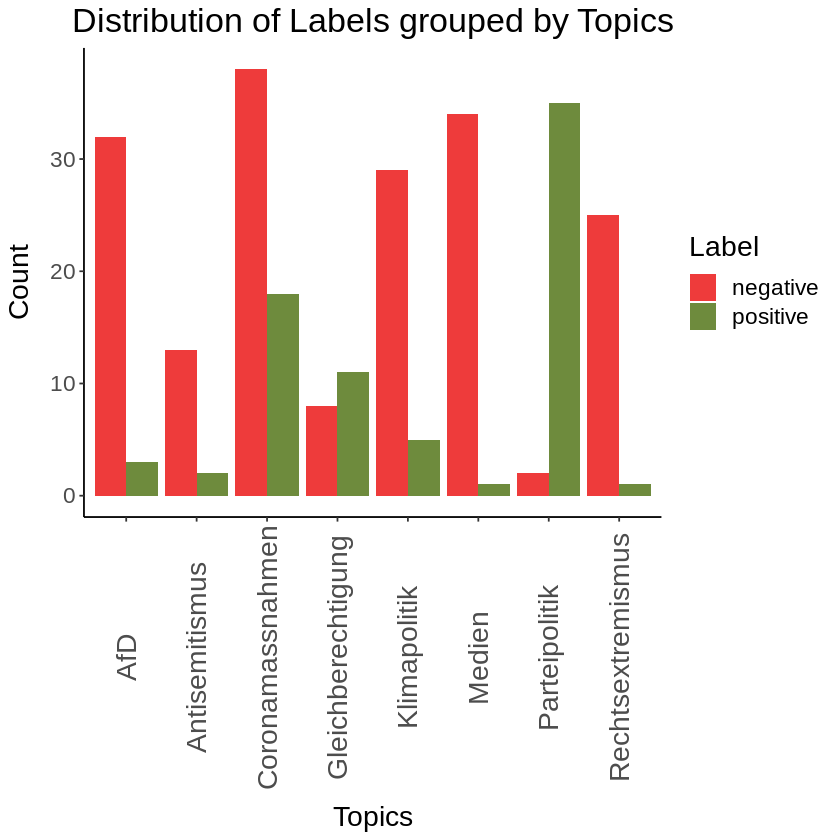

In [14]:
# Show the plot:
barplot_label_per_topic

# Wordclouds

Via *quanteda* package

In [15]:
# Create a document frequency matrix filtered by 1 topic
dfm_filtered_topic <- dfm(
  corpus_subset(
    corpus(data_labeled,
           text_field = "twitter_full_text"),
    topic %in% c("AfD")
  ),
  remove = stopwords("de"),
  remove_punct = TRUE,
  groups = "label"
) %>%
  dfm_trim(min_termfreq = 3)

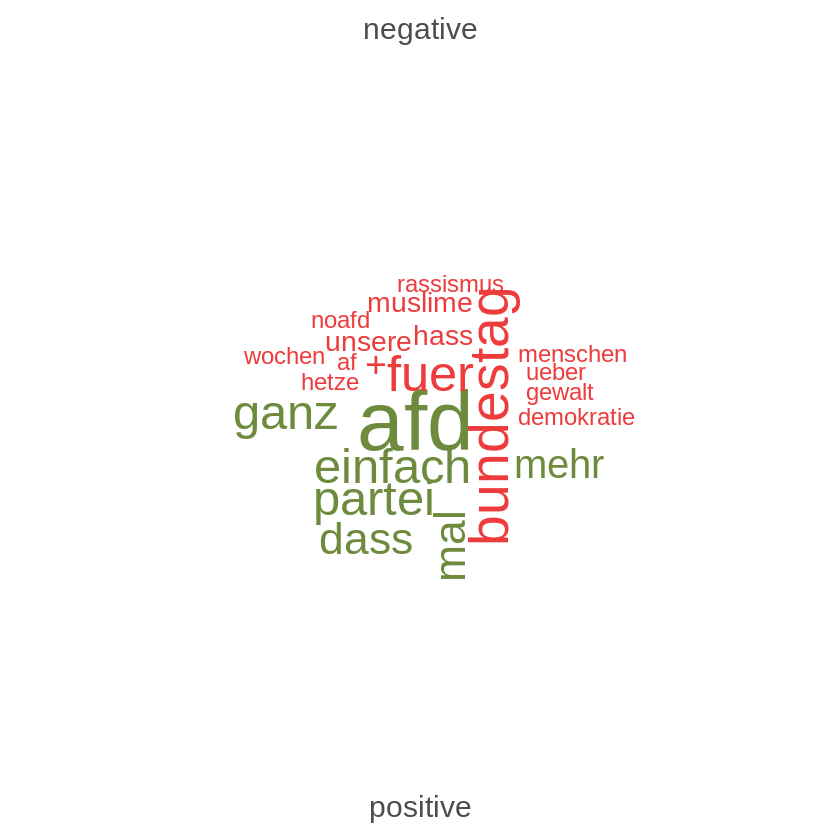

In [19]:
# The actual wordcloud: 
textplot_wordcloud(dfm_filtered_topic, 
                   comparison = TRUE, 
                   max_words = 300,
                   adjust = 0.1,
                   color = c("brown2", "darkolivegreen4"))


Via *tidytext* & *wordcloud* package

In [1]:
# Count the word frequencies
word_frequencies <- data_labeled %>%
  mutate(linenumber = row_number()) %>%
  unnest_tokens(word, twitter_full_text) %>%
  anti_join(get_stopwords(language = "de")) %>% 
  group_by(topic, label) %>% 
  count(word, sort = TRUE) %>%
  mutate(word = reorder(word, n)) %>% 
  ungroup()

ERROR: ignored

In [ ]:
# Filter by 1 topic
topic_name <- "Tuerkei"

word_frequencies_filtered_topic <- word_frequencies %>% 
  filter(topic == topic_name) %>% 
  top_n(20) %>% 
  mutate(color = ifelse(label == "positive", "darkolivegreen4", "brown2"))

In [ ]:
# Create the wordcloud
wordcloud(words = word_frequencies_filtered_topic$word, 
          freq = word_frequencies_filtered_topic$n, 
          min.freq = 1,
          max.words = 200, 
          ordered.colors = TRUE,
          random.order = FALSE,
          scale = c(2, 0.5),
          rot.per = 0.1,
          colors = word_frequencies_filtered_topic$color)
legend("topright", legend = levels(factor(word_frequencies_filtered_topic$label)), 	
       text.col = c("brown2", "darkolivegreen4"))

Word Frequencies

In [ ]:
visualize_word_frequencies <- word_frequencies_filtered_topic %>%
  mutate(word = reorder(word, n)) %>%
  filter(n > 2) %>% 
  ggplot(aes(reorder(word, -n), n, fill = label)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() +
  ylab("Count") +
  xlab("Words") +
  theme_classic() +
  theme(text = element_text(size = 17),
        axis.text.x = element_text(size = 17, vjust = 0.5),
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
        legend.position = "right",
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_manual(
    "Label",
    values = c("brown2", "darkolivegreen4")
  ) +
  labs(title = "") +
  ggtitle(paste0("Word frequencies in topic ", topic_name))


In [ ]:
# Show the plot: 
visualize_word_frequencies